In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pykitti
import robot_utils
import datetime as dt
from robot_utils.robot_data import ImgData, PoseData
from robot_utils.transform import T_FLURDF
import pandas as pd
from scipy.spatial.transform import Rotation as Rot
from dataset_utils import Dataset_Handler, pointcloud2image

In [2]:
base_path = '/media/lucas/T7/KITTI/odometry/dataset'
sequence_id = '00'

In [3]:
pose_data = PoseData.from_kitti(base_path)
rgb_data = ImgData.from_kitti(base_path, kitti_type='rgb')
depth_data = ImgData.from_kitti(base_path, kitti_type='depth')

### Check whether rgb imgs are loaded correctly ###

<Axes: >

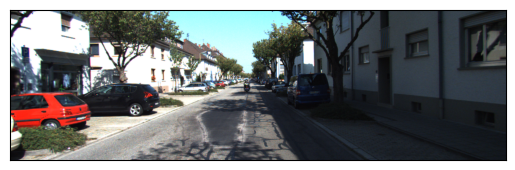

In [4]:
rgb_data.show(3)

### Check whether depth imgs are loaded correctly ###

In [5]:
true_pcd = np.fromfile('/media/lucas/T7/KITTI/odometry/dataset/sequences/00/velodyne/' + str(29).zfill(6) + '.bin',
                       dtype=np.float32, count=-1).reshape([-1,4])

In [6]:
handler = Dataset_Handler('00')

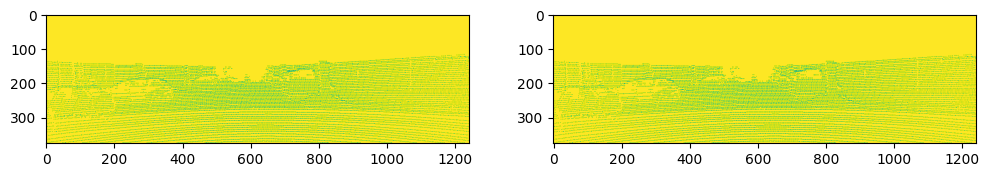

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.imshow(depth_data.img(3.0))
ax2.imshow(pointcloud2image(true_pcd, handler.imheight, handler.imwidth, handler.Tr, handler.P0))

### Check pose data ###

In [8]:
true_poses = pd.read_csv('/media/lucas/T7/KITTI/odometry/dataset/poses/00.txt', delimiter=' ', header=None)

In [9]:
print(np.array(true_poses.iloc[29]).reshape((3, 4)))

[[ 9.990298e-01  1.265253e-02 -4.218321e-02 -1.436633e+00]
 [-1.299403e-02  9.998849e-01 -7.831284e-03 -8.456208e-01]
 [ 4.207926e-02  8.371815e-03  9.990791e-01  2.559694e+01]]


In [11]:
pose_data._untransformed_position(3.0)

array([-1.436633 , -0.8456208, 25.59694  ])

In [12]:
Rot.from_quat(pose_data.orientation(3.0)).as_matrix()

array([[ 0.99902977,  0.01265253, -0.04218321],
       [-0.01299403,  0.99988491, -0.00783128],
       [ 0.04207927,  0.00837182,  0.9990792 ]])

### Investigate the Map ###

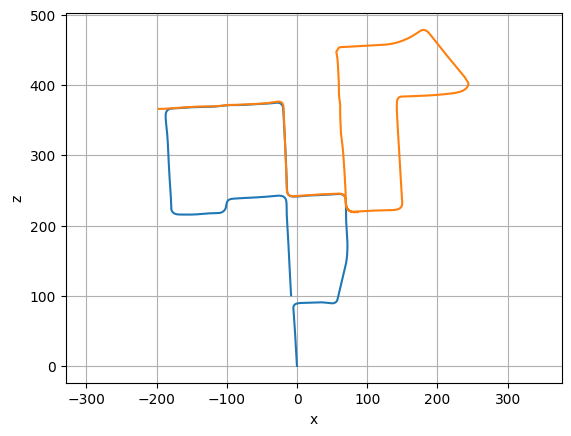

In [19]:
ax = pose_data.plot2d(tf=pose_data.t0+160, axes='xz')
ax = pose_data.plot2d(t0=pose_data.t0+250, tf=pose_data.t0+400, axes='xz')